<a href="https://colab.research.google.com/github/benmsanderson/tutorial/blob/main/FAIR_nuclear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
!pip install fair
import fair

     |████████████████████████████████| 3.4 MB 9.0 MB/s 


In [ ]:
import numpy as np
from scipy import stats
from fair.tools.ensemble import tcrecs_generate

from matplotlib import pyplot as plt
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (16, 9)

In [ ]:
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85
from fair.SSPs import ssp370, ssp126, ssp585, ssp119

In [ ]:
#start with test simulations built on SSP3-RCP7
ssp370.Emissions.year[257]
g10_rf=ssp370.Emissions.emissions[:,1]*0
g10_rf[257:287]=-60*np.exp(-np.arange(1,31,1)/6.3)
g5_rf=ssp370.Emissions.emissions[:,1]*0
g5_rf[257:287]=-27*np.exp(-np.arange(1,31,1)/6.3)
g1_rf=ssp370.Emissions.emissions[:,1]*0
g1_rf[257:287]=-6*np.exp(-np.arange(1,31,1)/6.3)

In [ ]:
#function to simulate nuclear pulse given initial forcing level and decay time
def nfn(a,t):
  ans=ssp370.Emissions.emissions[:,1]*0
  ans[257:307]=-a*np.exp(-np.arange(1,51,1)/t)
  return ans

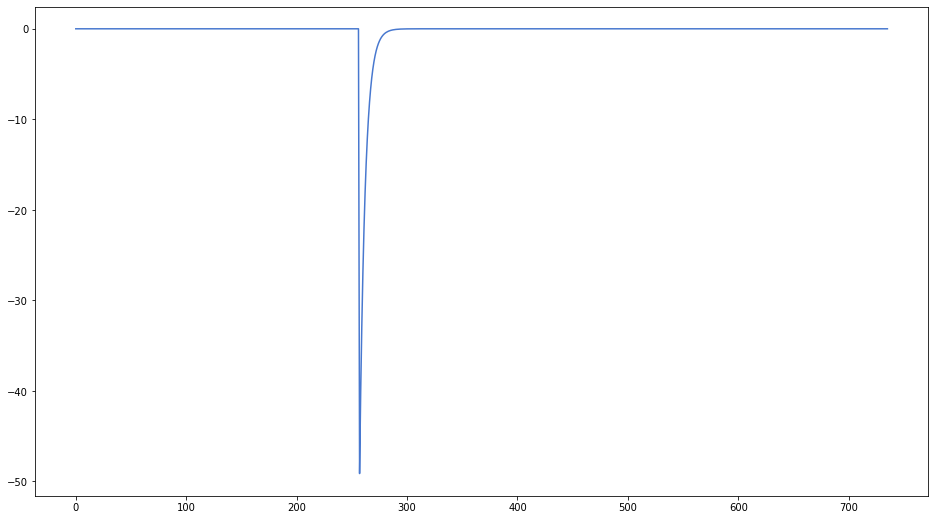

In [ ]:
plt.plot(nfn(60,5))

/usr/local/lib/python3.7/dist-packages/fair/gas_cycle/fair1.py:66: RuntimeWarning: overflow encountered in exp
  iirf_arr = alp_b*(np.sum(a*tau*(1.0 - np.exp(-iirf_h/(tau*alp_b)))))
/usr/local/lib/python3.7/dist-packages/fair/gas_cycle/fair1.py:66: RuntimeWarning: overflow encountered in exp
  iirf_arr = alp_b*(np.sum(a*tau*(1.0 - np.exp(-iirf_h/(tau*alp_b)))))


(1850.0, 2100.0)

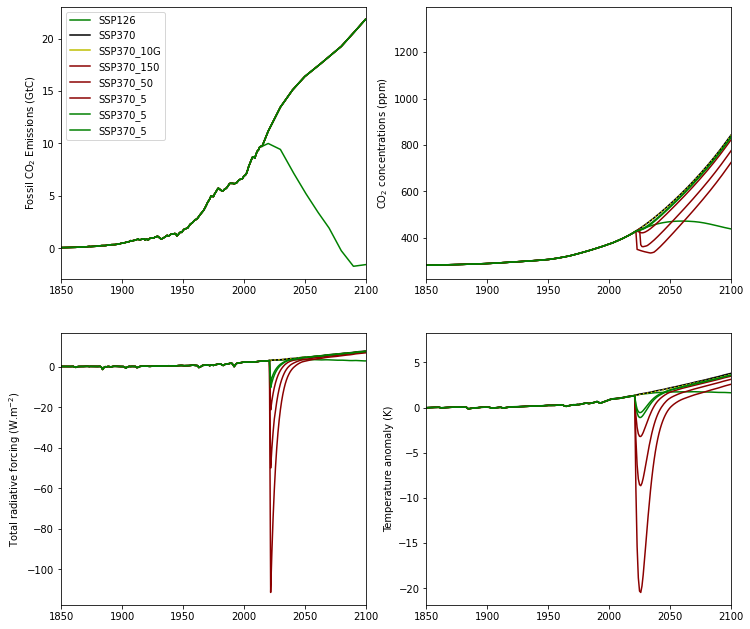

In [ ]:

fig = plt.figure(figsize=(12, 11))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#conventional SSP-RCPs
C26, F26, T26 = fair.forward.fair_scm(emissions=ssp126.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, ssp126.Emissions.co2_fossil, color='green', label='SSP126')
ax2.plot(rcp3pd.Emissions.year, C26[:, 0], color='green')
ax3.plot(rcp3pd.Emissions.year, np.sum(F26, axis=1), color='green')
ax4.plot(rcp3pd.Emissions.year, T26, color='green')

C37, F37, T37 = fair.forward.fair_scm(emissions=ssp370.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='black', label='SSP370')
ax2.plot(rcp3pd.Emissions.year, C37[:, 0], color='black')
ax3.plot(rcp3pd.Emissions.year, np.sum(F37, axis=1), color='black')
ax4.plot(rcp3pd.Emissions.year, T37, color='black')

C37g0, F37g0, T37g0 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='y', label='SSP370_10G')
ax2.plot(rcp3pd.Emissions.year, C37g0, color='y',linestyle=':')
ax3.plot(rcp3pd.Emissions.year, F37g0, color='y',linestyle=':')
ax4.plot(rcp3pd.Emissions.year, T37g0, color='y',linestyle=':')

#for the nuclear simulations, we run with Mutligas off.  nonco2 radiative forcing from the baseline case is used, in addition to the nuclear pulse in the other_rf term
#the following forcings were munually adjusted to 65 and 30Wm^-2 to match the 2 and 8k cooling seen in Robock 2007

C37g150, F37g150, T37g150 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(65,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='darkred', label='SSP370_150')
ax2.plot(rcp3pd.Emissions.year, C37g150, color='darkred')
ax3.plot(rcp3pd.Emissions.year, F37g150, color='darkred')
ax4.plot(rcp3pd.Emissions.year, T37g150, color='darkred')


C37g50, F37g50, T37g50 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(30,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='darkred', label='SSP370_50')
ax2.plot(rcp3pd.Emissions.year, C37g50, color='darkred')
ax3.plot(rcp3pd.Emissions.year, F37g50, color='darkred')
ax4.plot(rcp3pd.Emissions.year, T37g50, color='darkred')

#this is the response to 140Wm^-2 - the 90th percentile of the distribution calculated below
C37g300, F37g300, T37g300 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(140,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='darkred', label='SSP370_5')
ax2.plot(rcp3pd.Emissions.year, C37g300, color='darkred')
ax3.plot(rcp3pd.Emissions.year, F37g300, color='darkred')
ax4.plot(rcp3pd.Emissions.year, T37g300, color='darkred')

#this is for the smaller event
C37g5, F37g5, T37g5 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(13,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='g', label='SSP370_5')
ax2.plot(rcp3pd.Emissions.year, C37g5, color='green')
ax3.plot(rcp3pd.Emissions.year, F37g5, color='g')
ax4.plot(rcp3pd.Emissions.year, T37g5, color='g')

#this is for the smaller event
C37g6, F37g6, T37g6 = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),other_rf=nfn(16.5,5)+np.sum(F37[:,1:], axis=1),
    useMultigas=False)
ax1.plot(rcp3pd.Emissions.year, ssp370.Emissions.co2_fossil, color='g', label='SSP370_5')
ax2.plot(rcp3pd.Emissions.year, C37g6, color='green')
ax3.plot(rcp3pd.Emissions.year, F37g6, color='g')
ax4.plot(rcp3pd.Emissions.year, T37g6, color='g')




ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');
ax1.set_xlim(1850,2100)
ax2.set_xlim(1850,2100)
ax3.set_xlim(1850,2100)
ax4.set_xlim(1850,2100)



In [ ]:
T37g5[256]-T37g5[256:].min()
T37g6[256]-T37g6[256:].min()


2.4160116135423317

Create parameter sampling for both climate and nuclear parameters

In [ ]:
# number of prior ensemble members
samples = 1000

# generate some joint lognormal TCR and ECS pairs
tcrecs = tcrecs_generate(n=1000, seed=38571)

# generate some forcing scale factors with SD of 10% of the best estimate
# Chris: this is over-constrained and probably just something from my example
# Instead let's repeat what we did in FaIR 1.3 code, component by component 
# using AR5 scalings
zscore = stats.norm.ppf(0.95)
scales1d = np.array(
    [
        0.2,      # CO2
        0.28,     # CH4: updated value from etminan 2016
        0.2,      # N2O
        0.2,      # other WMGHS
        0.4-0.2,        # tropospheric O3
        -0.05-(-0.15),  # stratospheric O3
        0.07-0.02,      # stratospheric WV from CH4
        1,              # contrails (lognormal)
        0.8/0.9,  # aerosols
        1,      # black carbon on snow (lognormal)
        -0.15-(-0.25),  # land use change
        1.0-0.5,        # volcanic
        0.05
     ]
)/zscore # solar (additive)
scales2d = np.repeat(scales1d[np.newaxis,:],samples,axis=0)

locs = np.array([1,1,1,1,0.4,-0.05,0.07,1,1,1,-0.15,1.0,0.00])
locs2d = np.repeat(locs[np.newaxis,:],samples,axis=0)

# BC-snow and contrails are lognormal with sigma=0.5 and sigma=0.65: see page 8SM-11
F_scale = stats.norm.rvs(size=(samples,13), loc=locs2d[:,:13], scale=scales2d[:,:13], random_state=40000)
F_scale[:,9] = stats.lognorm.rvs(0.5, size=samples, random_state=40001)
F_scale[:,7]  = stats.lognorm.rvs(0.65, size=samples, random_state=40002)

# aerosols are asymmetric Gaussian
F_scale[F_scale[:,8]<-0.9,8] = 1./0.8*(F_scale[F_scale[:,8]<-0.9,8]+0.9) - 0.9


#F_scale = stats.norm.rvs(size=(samples,13), loc=1, scale=0.1, random_state=40000)

# do the same for the carbon cycle parameters
r0 = stats.norm.rvs(size=samples, loc=35, scale=3.5, random_state=41000)
rc = stats.norm.rvs(size=samples, loc=0.019, scale=0.0019, random_state=42000)
rt = stats.norm.rvs(size=samples, loc=4.165, scale=0.4165, random_state=45000)

#now the nuclear winter parameters
# Chris: for reproducibility I'm going to put seeds on these
na = stats.lognorm.rvs(size=samples,s=0.603, random_state=44999)*65.
na_small =  stats.lognorm.rvs(size=samples,s=.075, random_state=44999)*14.5
ta = stats.norm.rvs(size=samples, loc=5, scale=0.5, random_state=45000)

# use a different seed for nv
nv=stats.norm.rvs(size=samples, loc=.22, scale=.04, random_state=45001)

T = np.zeros((736,samples))

In [ ]:
#90th percentile of nuclear initial forcing
np.percentile(na,90)

In [ ]:
np.percentile(na_small,10)

In [ ]:
#Run SSP3 basline ensemble to calibrate plausible FAIR parameters
%%time
for i in range(samples):
    _, _, T[:,i] = fair.forward.fair_scm(emissions=ssp370.Emissions.emissions,
                        r0 = r0[i],
                        rc = rc[i],
                        rt = rt[i],
                        tcrecs = tcrecs[i,:],
                        scale = F_scale[i,:],
                        F2x = 3.71*F_scale[i,0])   # scale F2x with the CO2 scaling factor for consistency

In [ ]:
#Follow Smith et al to constrain output based on CW
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
from fair.tools.constrain import hist_temp

# load up Cowtan and Way data remotely
url = 'http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_krig_annual_v2_0_0.txt'
response = urlopen(url)

CW = np.loadtxt(response)
constrained = np.zeros(samples, dtype=bool)

for i in range(samples):
    # we use observed trend from 1880 to 2016
    constrained[i], _, _, _, _ = hist_temp(CW[30:167,1], T[1880-1765:2017-1765,i], CW[30:167,0])
    
# How many ensemble members passed the constraint?
print('%d ensemble members passed historical constraint' % np.sum(constrained))

In [ ]:
# Plot constrained basaline ensemble
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp85.Emissions.year, T[:,constrained]);

Run FAIR simulations for conventional and nuclear simulation

In [ ]:
nc=np.sum(constrained)
Te37 = np.zeros((736,nc))
Fe37 = np.zeros((736,np.shape(F37)[1],nc))
Ce37 = np.zeros((736,np.shape(C37)[1],nc))
Te85 = np.zeros((736,nc))
Fe85 = np.zeros((736,np.shape(F37)[1],nc))
Ce85 = np.zeros((736,np.shape(C37)[1],nc))
Te26 = np.zeros((736,nc))
Fe26 = np.zeros((736,np.shape(F37)[1],nc))
Ce26 = np.zeros((736,np.shape(C37)[1],nc))
Te37_10g = np.zeros((736,nc))
Fe37_10g = np.zeros((736,nc))
Ce37_10g = np.zeros((736,nc))
Te37_10ge = np.zeros((736,nc))
Fe37_10ge = np.zeros((736,nc))
Ce37_10ge = np.zeros((736,nc))
Te37_10gv = np.zeros((736,nc))
Fe37_10gv = np.zeros((736,nc))
Ce37_10gv = np.zeros((736,nc))
Te37_1ge = np.zeros((736,nc))
Fe37_1ge = np.zeros((736,nc))
Ce37_1ge = np.zeros((736,nc))
nuc_emis = np.zeros((736,nc))
nuc_emis_reg = np.zeros((736,nc))

#veg_emis = np.zeros((736,nc))
#nuc_emisl = np.zeros((736,nc))
#veg_emisl = np.zeros((736,nc))
#Te37_10gl = np.zeros((736,nc))
#Fe37_10gl = np.zeros((736,nc))
#Ce37_10gl = np.zeros((736,nc))
for i,j in enumerate(np.arange(1000)[constrained==True]):
    print(i)
    #calculate nuclear pulse for this ensemble member
    nuc_rf=nfn(na[j],ta[j])
    nuc_rf_reg=nfn(na_small[j],ta[j])
    
    #Fire emissions are scaled relative to central -60Wm-2 simulation, using the central estimate from Turco 1990 of 5GtC
    nuc_emis[257,i]=na[j]/60*5.075
    nuc_emis_reg[257,i]=na_small[j]/60*5.075
    

 #RCP85
    Ce85[:,:,i], Fe85[:,:,i], Te85[:,i] = fair.forward.fair_scm(emissions=ssp585.Emissions.emissions,
                        r0 = r0[j],
                        rc = rc[j],
                        rt = rt[j],
                        tcrecs = tcrecs[j,:],
                        scale = F_scale[j,:],
                        F2x = 3.71*F_scale[j,0])   # scale F2x with the CO2 scaling factor for consistency
                        #RCP7-SSP3
    Ce37[:,:,i], Fe37[:,:,i], Te37[:,i] = fair.forward.fair_scm(emissions=ssp370.Emissions.emissions,
                        r0 = r0[j],
                        rc = rc[j],
                        rt = rt[j],
                        tcrecs = tcrecs[j,:],
                        scale = F_scale[j,:],
                        F2x = 3.71*F_scale[j,0])  
                       # SSP1-RCP26
    Ce26[:,:,i], Fe26[:,:,i], Te26[:,i] = fair.forward.fair_scm(emissions=ssp126.Emissions.emissions,
                        r0 = r0[j],
                        rc = rc[j],
                        rt = rt[j],
                        tcrecs = tcrecs[j,:],
                        scale = F_scale[j,:],
                        F2x = 3.71*F_scale[j,0])  
    
                      #nuclear scenario, no fire emissions
    Ce37_10g[:,i], Fe37_10g[:,i], Te37_10g[:,i] = fair.forward.fair_scm(emissions=np.sum(ssp370.Emissions.emissions[:,1:3],axis=1),
                                                                other_rf=nuc_rf+np.sum(Fe37[:,1:,i], axis=1),
                                                                useMultigas=False,
                        r0 = r0[j],
                        rc = rc[j],
                        rt = rt[j],
                        tcrecs = tcrecs[j,:],
                        scale = F_scale[j,0],
                        F2x = 3.71*F_scale[j,0]) 
                          #nuclear scenario, with fire emissions
    Ce37_10ge[:,i], Fe37_10ge[:,i], Te37_10ge[:,i] = fair.forward.fair_scm(emissions=
                                                                np.sum(ssp370.Emissions.emissions[:,1:3],axis=1)+nuc_emis[:,i],
                                                                other_rf=nuc_rf+np.sum(Fe37[:,1:,i], axis=1),
                                                                useMultigas=False,
                        r0 = r0[j],
                        rc = rc[j],
                        rt = rt[j],
                        tcrecs = tcrecs[j,:],
                        scale = F_scale[j,0],
                        F2x = 3.71*F_scale[j,0])   
    Ce37_1ge[:,i], Fe37_1ge[:,i], Te37_1ge[:,i] = fair.forward.fair_scm(emissions=
                                                                np.sum(ssp370.Emissions.emissions[:,1:3],axis=1)+nuc_emis_reg[:,i],
                                                                other_rf=nuc_rf_reg+np.sum(Fe37[:,1:,i], axis=1),
                                                                useMultigas=False,
                        r0 = r0[j],
                        rc = rc[j],
                        rt = rt[j],
                        tcrecs = tcrecs[j,:],
                        scale = F_scale[j,0],
                        F2x = 3.71*F_scale[j,0])   


Plot output

In [ ]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12, 11))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


sns.set()
#Temperature
ax3.fill_between(rcp85.Emissions.year, np.percentile(Te85,10,axis=1), np.percentile(Te85,90,axis=1), color='m', alpha=0.2)
ax3.fill_between(rcp85.Emissions.year, np.percentile(Te37,10,axis=1), np.percentile(Te37,90,axis=1), color='k', alpha=0.2)
ax3.fill_between(rcp85.Emissions.year, np.percentile(Te37_10ge,10,axis=1), np.percentile(Te37_10ge,90,axis=1), color='darkred', alpha=0.2)
ax3.fill_between(rcp85.Emissions.year, np.percentile(Te37_1ge,10,axis=1), np.percentile(Te37_1ge,90,axis=1), color='orange', alpha=0.2)
ax3.fill_between(rcp85.Emissions.year, np.percentile(Te26,10,axis=1), np.percentile(Te26,90,axis=1), color='g', alpha=0.2)

ax3.plot(rcp85.Emissions.year, Te37_10ge.mean(axis=1), '-',color='darkred', label='SSP3-7.0-NW')
ax3.plot(rcp85.Emissions.year, Te37_1ge.mean(axis=1), '-',color='orange', label='SSP3-7.0-RC')
ax3.plot(rcp85.Emissions.year, Te26.mean(axis=1), '-',color='green', label='SSP1-2.6')
ax3.plot(rcp85.Emissions.year, Te37.mean(axis=1), 'k-', label='SSP3-7.0')
ax3.plot(rcp85.Emissions.year, Te85.mean(axis=1), 'm-', label='SSP5-8.5')
ax3.plot(np.arange(1880,2017),CW[30:167,1]+0.35,'c', label='Cowtan/Way')
ax3.set_title('(c)')

ax3.legend(title='Scenarios')
ax3.set_xlim(1950,2100)
ax3.set_ylim(-25,5)
ax3.set_ylabel('(K)')

#Concentrations
ax2.fill_between(rcp85.Emissions.year, np.percentile(Ce85[:,0,:],10,axis=1), np.percentile(Ce85[:,0,:],90,axis=1), color='m', alpha=0.2)
ax2.fill_between(rcp85.Emissions.year, np.percentile(Ce37[:,0,:],10,axis=1), np.percentile(Ce37[:,0,:],90,axis=1), color='k', alpha=0.2)
ax2.fill_between(rcp85.Emissions.year, np.percentile(Ce37_10ge,10,axis=1), np.percentile(Ce37_10ge,90,axis=1), color='darkred', alpha=0.2)
ax2.fill_between(rcp85.Emissions.year, np.percentile(Ce37_1ge,10,axis=1), np.percentile(Ce37_1ge,90,axis=1), color='orange', alpha=0.2)
ax2.fill_between(rcp85.Emissions.year, np.percentile(Ce26[:,0,:],10,axis=1), np.percentile(Ce26[:,0,:],90,axis=1), color='g', alpha=0.2)



ax2.plot(rcp85.Emissions.year, Ce37_10ge.mean(axis=1), '-',color='darkred', label='SSP3-7.0-NW')
ax2.plot(rcp85.Emissions.year, Ce37_1ge.mean(axis=1), '-',color='orange', label='SSP3-7.0-RC')
ax2.plot(rcp85.Emissions.year, Ce37[:,0,:].mean(axis=1), 'k-', label='SSP3-7.0')
ax2.plot(rcp85.Emissions.year, Ce85[:,0,:].mean(axis=1), 'm-', label='SSP5-8.5')
ax2.plot(rcp85.Emissions.year, Ce26[:,0,:].mean(axis=1), '-',color='green', label='SSP1-2.6')


ax2.legend(title='Scenarios')
ax2.set_xlim(1950,2100)
ax2.set_ylim(0,1000)
ax2.set_ylabel('(ppm)')
ax2.set_title('(b)')

#Radiative Forcing
ax1.fill_between(rcp85.Emissions.year, np.percentile(Fe85[:,:,:].sum(axis=1),10,axis=1), np.percentile(Fe85[:,:,:].sum(axis=1),90,axis=1), color='m', alpha=0.2)
ax1.fill_between(rcp85.Emissions.year, np.percentile(Fe37[:,:,:].sum(axis=1),10,axis=1), np.percentile(Fe37[:,:,:].sum(axis=1),90,axis=1), color='k', alpha=0.2)
ax1.fill_between(rcp85.Emissions.year, np.percentile(Fe37_10ge,10,axis=1), np.percentile(Fe37_10ge,90,axis=1), color='darkred', alpha=0.2)
ax1.fill_between(rcp85.Emissions.year, np.percentile(Fe37_1ge,10,axis=1), np.percentile(Fe37_1ge,90,axis=1), color='orange', alpha=0.2)
ax1.fill_between(rcp85.Emissions.year, np.percentile(Fe26[:,:,:].sum(axis=1),10,axis=1), np.percentile(Fe26[:,:,:].sum(axis=1),90,axis=1), color='g', alpha=0.2)


ax1.plot(rcp85.Emissions.year, Fe85[:,:,:].mean(axis=2).sum(axis=1), 'm-', label='SSP5-8.5')
ax1.plot(rcp85.Emissions.year, Fe26[:,:,:].mean(axis=2).sum(axis=1), 'g-', label='SSP1-2.6')
ax1.plot(rcp85.Emissions.year, Fe37[:,:,:].mean(axis=2).sum(axis=1), 'm-', label='SSP3-7.0')
ax1.plot(rcp85.Emissions.year, Fe37_10ge.mean(axis=1), '-',color='darkred', label='SSP3-7.0-NW')
ax1.plot(rcp85.Emissions.year, Fe37_1ge.mean(axis=1), '-',color='orange', label='SSP3-7.0-RC')


ax1.set_title('(a)')
ax1.legend(title='Scenarios')
ax1.set_xlim(1950,2100)
ax1.set_ylim(-120,20)
ax1.set_ylabel(r'($Wm^{-2}$)')



#carbon emissions assessed from difference with baseline
dc_10=np.diff(Ce37_10ge-Ce37[:,0,:],axis=0)*2.13
dc_1=np.diff(Ce37_1ge-Ce37[:,0,:],axis=0)*2.13


ax4.fill_between(rcp85.Emissions.year[1:], np.percentile(dc_10,10,axis=1), np.percentile(dc_10,90,axis=1), color='darkred', alpha=0.2)
ax4.fill_between(rcp85.Emissions.year[1:], np.percentile(dc_1,10,axis=1), np.percentile(dc_1,90,axis=1), color='orange', alpha=0.2)

#ax4.fill_between(rcp85.Emissions.year[:], np.percentile(nuc_emis,10,axis=1), np.percentile(nuc_emis,90,axis=1), color='black', alpha=0.2)
#ax4.fill_between(rcp85.Emissions.year[:], np.percentile(nuc_emis,10,axis=1), np.percentile(nuc_emis,90,axis=1), color='black', alpha=0.2)


ax4.plot(rcp85.Emissions.year[1:],  np.mean(dc_10,axis=1), '-',color='darkred', label='Ecosystem response (NW)')
ax4.plot(rcp85.Emissions.year[1:],  np.mean(dc_1,axis=1), '-',color='orange', label='Ecosystem response (RC)')

ax4.plot(rcp85.Emissions.year[257],  np.mean(nuc_emis[257,:]), 'o',markerfacecolor='darkred',markeredgecolor='black',  label='Fire emissions (NW)')
ax4.plot(rcp85.Emissions.year[257],  np.mean(nuc_emis_reg[257,:]), 'o',markerfacecolor='orange',markeredgecolor='black',  label='Fire emissions (RC)')
ax4.plot([rcp85.Emissions.year[257],rcp85.Emissions.year[257]],  np.percentile(nuc_emis[257,:],[10,90]), '-',color='darkred')


ax4.set_title('(d)')

ax4.legend(title=r'CO$_2$ fluxes to atmosphere')
ax4.set_xlim(1950,2100)
ax4.set_ylim(-200,50)
ax4.set_ylabel(r'($GtC$)')

In [ ]:
np.percentile(nuc_emis_reg[257,:],[10,50,90])


In [ ]:
np.percentile(nuc_emis[257,:],[10,50,90])
